In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [3]:
df=pd.read_csv('CasesState&Date_wise.csv')

In [4]:
df

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,1/30/2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,1/31/2020,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2/1/2020,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2/2/2020,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2/3/2020,Kerala,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,8/6/2020,Telangana,18.1124,79.0193,73050,589,52103,2092,0,1289
4688,8/6/2020,Tripura,23.9408,91.9882,5725,31,3793,97,0,68
4689,8/6/2020,Uttar Pradesh,26.8467,80.9462,104388,1857,60558,4078,0,3287
4690,8/6/2020,Uttarakhand,30.0668,79.0193,8254,98,5233,246,0,386


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4692 non-null   object 
 1   Name of State / UT         4692 non-null   object 
 2   Latitude                   4692 non-null   float64
 3   Longitude                  4692 non-null   float64
 4   Total Confirmed cases      4692 non-null   int64  
 5   Death                      4692 non-null   object 
 6   Cured/Discharged/Migrated  4692 non-null   int64  
 7   New cases                  4692 non-null   int64  
 8   New deaths                 4692 non-null   int64  
 9   New recovered              4692 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 366.7+ KB


In [6]:
df['Death']
#changing the object to numeric data

0          0
1          0
2          0
3          0
4          0
        ... 
4687     589
4688      31
4689    1857
4690      98
4691    1846
Name: Death, Length: 4692, dtype: object

In [7]:
df['Death'].replace('0#',0,inplace=True)

In [8]:
df['Death']=df['Death'].astype('int64')
#removing the garbage variable and type converting the object to numeric

In [9]:
df.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases          int64
Death                          int64
Cured/Discharged/Migrated      int64
New cases                      int64
New deaths                     int64
New recovered                  int64
dtype: object

Here we are removing the insignificant variables Latitude and Longitude  because that columns is not needed in prediction even Date is not needed for prediction right now we will be needed for other analsis.
We also will be removing New Deaths column as it has null values entirely.

In [10]:
#checking for null values
df.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [11]:
#checking for duplicate rows
df[df.duplicated()]

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered


In [12]:
df.drop(['Latitude','Longitude','New deaths'],axis=1,inplace=True)

In [13]:
num_col=df.select_dtypes(np.number)

In [14]:
#removing negative values 
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for ind in df[col].index:
        if  df.loc[ind,col]<ll:
            df.loc[ind,col]=ll
        else:
            pass

In [15]:
df.describe()

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000
mean,11393.925192,291.218670,6908.130648,418.643009,283.069054
std,37208.600846,1213.695272,23390.671258,1259.748923,947.925811
min,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,39.000000,0.000000,9.000000,1.000000,0.000000
50%,619.000000,5.000000,197.500000,26.000000,8.000000
75%,5233.000000,68.250000,2736.000000,210.250000,119.000000
max,468265.000000,16476.000000,305521.000000,18366.000000,13401.000000


We are setting total confirmed Cases as owr target variable as it has a significant relationship with other variables and we need to predict the total cases 

Checking for Relationship among indpendent and Target variable

<AxesSubplot:>

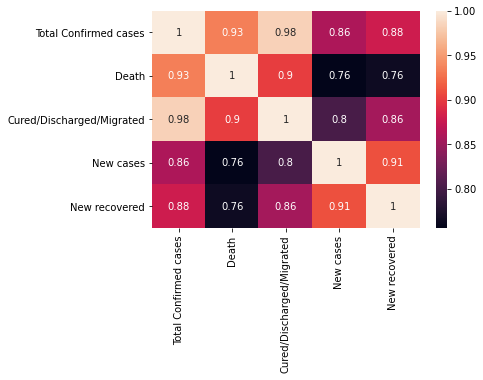

In [16]:
sns.heatmap(df.corr(),annot=True)

Now will check the relationship between the indpendent variable and target variable through EDA analysis.

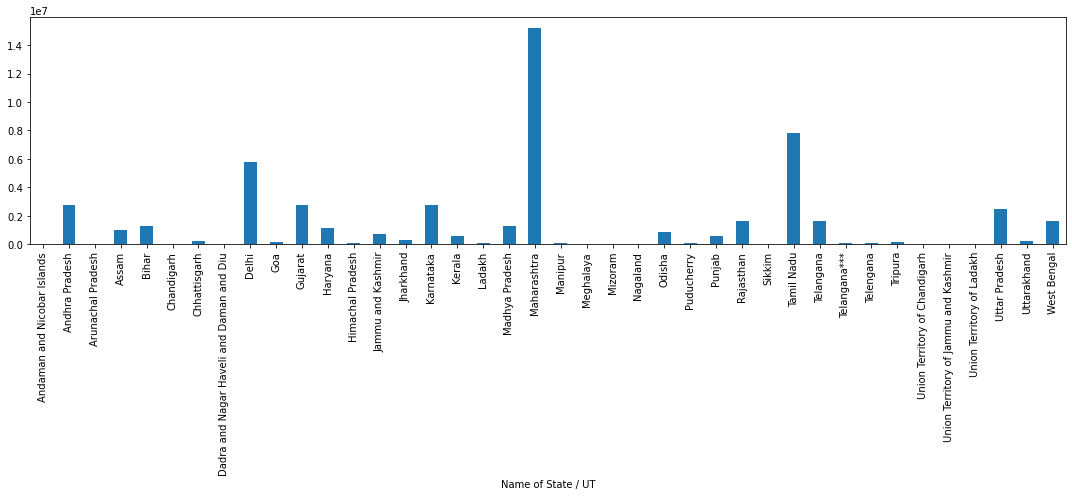

In [17]:
#checking for state wise cases
plt.figure(figsize=[15,7])
df.groupby('Name of State / UT')['Total Confirmed cases'].sum().plot(kind='bar')
plt.tight_layout()

So as we see Maharashtra has the Highest no of confirmed Cases and Tamil Nadu is leading with Delhi next to it .There are currently many states which have less cases

Here New Cases and Total Confirmed Cases might have some Intraction or they might  convey the same meaning lets keep that variable  until we fit it to train test split . The above data does not require scaling or transformation ,interaction might be needed 


C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


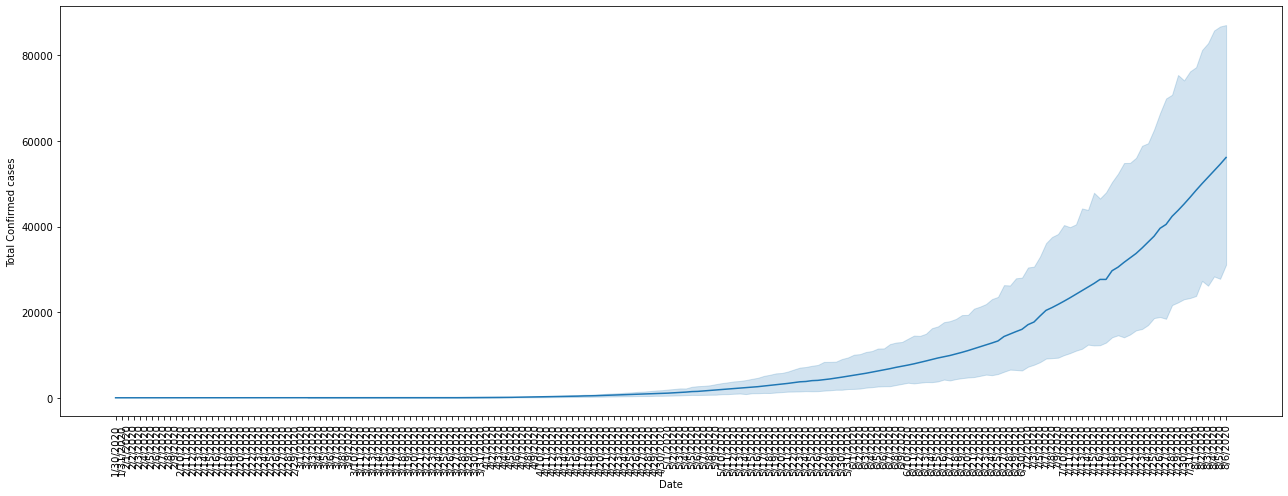

In [18]:
plt.figure(figsize=[18,7])
plt.xticks(rotation='vertical')
sns.lineplot(df['Date'],df['Total Confirmed cases'])
plt.tight_layout()

While seeing the above graph the rise in covid cases are increasing by month from the year 2020 from the month january to August

In [19]:
#lets check if some data is missing then fill it with 0
state_cases= df[df['Date']==df['Date'].max()].copy().fillna(0)
state_cases.index=state_cases['Name of State / UT'] # set state as index
state_cases=state_cases.drop(['Name of State / UT','Date'],axis=1)

In [20]:
df1=pd.DataFrame(pd.to_numeric(state_cases.sum()),dtype=np.float64).transpose()
df1.style.background_gradient(cmap='summer_r',axis=1)
#summary:

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
0,1964536.000000,40699.000000,1328336.000000,56282.000000,46121.000000


In [21]:
state_cases.columns

Index(['Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated',
       'New cases', 'New recovered'],
      dtype='object')

In [22]:
state_cases.sort_values('Total Confirmed cases',ascending=False).style\
    .background_gradient(cmap='YlGn_r',subset=['Total Confirmed cases'])\
    .background_gradient(cmap='BrBG_r',subset=['Death'])\
    .background_gradient(cmap='BuPu',subset=['Cured/Discharged/Migrated'])\
    .background_gradient(cmap='YlOrBr',subset=['New cases'])\
    .background_gradient(cmap='GnBu',subset=['New recovered'])   

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered
Name of State / UT,,,,,
Maharashtra,468265,16476,305521,10309,6165
Tamil Nadu,273460,4461,214815,5175,6031
Andhra Pradesh,186461,1681,104354,10128,8729
Karnataka,151449,2804,74679,5619,5407
Delhi,140232,4044,126116,1076,890
Uttar Pradesh,104388,1857,60558,4078,3287
West Bengal,83800,1846,58962,2816,2078
Telangana,73050,589,52103,2092,1289
Gujarat,66669,2556,49433,1070,1057


In [23]:
#Checking if Cured/Discharged/Migrated column have impact on Target variable

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cured/Discharged/Migrated', ylabel='Total Confirmed cases'>

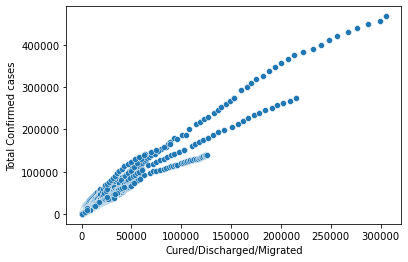

In [24]:
sns.scatterplot(df['Cured/Discharged/Migrated'],df['Total Confirmed cases'])

As we see ,there is a positive relationship between the Cured Cases and confirmed Cases. 
As an infrence we can say that when the number of cases increases the people who get cured also increase .
The impact is positive

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='New cases', ylabel='Total Confirmed cases'>

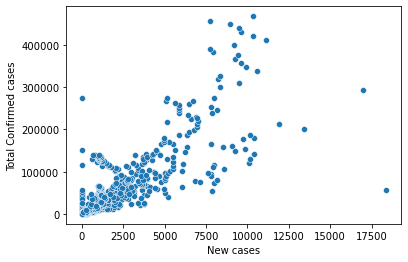

In [25]:
#does new Cases have an impact on Total Confirmed Cases
sns.scatterplot(df['New cases'],df['Total Confirmed cases'])

Yes we can say there is a positive relationship in this Variable too, as the No of Cases increase total Cases also increase the relationship is positive.

So  doing Some Statistical Analysis on the Target variable .

Hypothesis:
H0:Total_confirmed_cases <=12000

HA:Total_confirmed_cases >12000

In [26]:
#lets take alpha values as 0.02 as for owr buisness need 
alpha=0.02

In [27]:
import scipy.stats as st

In [28]:
#here we are doing a T test because we assume this  data is a sample from a population
xbar=df['Total Confirmed cases'].mean()
s=df['Total Confirmed cases'].std(ddof=1)
mue=12000
n=len(df['Total Confirmed cases'])
se=s/np.sqrt(n)
t_stat=(xbar-mue)/se#t test 
t_critic=st.t.isf(alpha/2,n-1)

In [29]:
#p value for the t test
p_value=st.t.cdf(t_stat,n-1)

In [30]:
#critical value approch
st.t.interval(1-alpha,n-1,xbar,se)
#with 98% confidence interval say that the average total cases lies between 10129 and 12658

(10129.807751627313, 12658.0426320044)

In [31]:
print(p_value,t_stat,t_critic)

0.13229590663656116 -1.1157371528567985 2.3271430763115677


Since P value is less than alpha we fail  reject H0 so this says on average the Total confirmed cases are  more than 12000 every year.
As the Average cases increases  to more than 13k  the   P value decreases .so we can say on average the number of cases lies between 12000 to 13000 ever year

Building a model with Total Confirmed Cases as our (target Variable) and Other variables are independent.

Since our Target variable is Continuous, we will be doing  Regression Analysis

In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [33]:
#here we will drop the Date column as it represents time 
df.drop('Date',axis=1,inplace=True)

In [34]:
#lets consider the State column as we can see how much each State is contributing and Infering as it has too many variables in it lets consider it for now
df['Name of State / UT'].value_counts().count()

40

In [35]:
#converting the Categorical varaible into numberic by using Dummies
cat_var=pd.get_dummies(df['Name of State / UT'],drop_first=True)
num_var=df.drop(['Name of State / UT','Total Confirmed cases'],axis=1)

In [36]:
X=pd.concat([cat_var,num_var],axis=1)
sm_X=sm.add_constant(X)
y=df['Total Confirmed cases']

In [37]:
X_train,X_test,y_train,y_test=train_test_split(sm_X,y,test_size=0.3,random_state=101)
#so we are splitting the data into train and test with test size 0.3

In [38]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [39]:
#building a basic model
model=sm.OLS(y_train,X_train).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Total Confirmed cases   R-squared:                       0.991
Model:                               OLS   Adj. R-squared:                  0.991
Method:                    Least Squares   F-statistic:                     8451.
Date:                   Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                           19:27:24   Log-Likelihood:                -31231.
No. Observations:                   3284   AIC:                         6.255e+04
Df Residuals:                       3240   BIC:                         6.282e+04
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        3.7026    352.447      0.011      0.992    -687.339     694.744
Andhra Pradesh                            1892.3509    488.517      3.874      0.000     934.518    2850.184
Arunachal Pradesh                           63.9761    501.358      0.128      0.898    -919.035    1046.987
Assam                                      409.4581    503.140      0.814      0.416    -577.047    1395.963
Bihar                                      438.4961    495.720      0.885      0.376    -533.461    1410.453
Chandigarh                                  20.1778    486.613      0.041      0.967    -933.922     974.277
Chhattisgarh                               170.6755    484.311      0.352      0.725    -778.911    1120.262
Dadra and Nagar Haveli and Daman and Diu    35.6261    543.837      0.066      0.948   -1030.674    1101.926
Delhi                                    -2642.9704    483.045     -5.471      0.000   -3590.075   -1695.865
Goa                                        140.4906    494.290      0.284      0.776    -828.663    1109.644
Gujarat                                  -3300.3606    489.248     -6.746      0.000   -4259.627   -2341.095
Haryana                                    153.8107    477.317      0.322      0.747    -782.064    1089.685
Himachal Pradesh                            93.5906    477.634      0.196      0.845    -842.905    1030.087
Jammu and Kashmir                          804.0931    487.949      1.648      0.099    -152.627    1760.813
Jharkhand                                  454.4593    489.148      0.929      0.353    -504.611    1413.530
Karnataka                                 3714.3691    487.743      7.615      0.000    2758.053    4670.685
Kerala                                     633.3395    459.885      1.377      0.169    -268.355    1535.034
Ladakh                                      75.2211    497.018      0.151      0.880    -899.281    1049.723
Madhya Pradesh                            -805.1736    500.418     -1.609      0.108   -1786.342     175.995
Maharashtra                               3559.9587    540.577      6.585      0.000    2500.051    4619.866
Manipur                                    142.7436    486.617      0.293      0.769    -811.364    1096.851
Meghalaya                                   50.6344    517.988      0.098      0.922    -964.983    1066.252
Mizoram                                     27.2174    494.263      0.055      0.956    -941.883     996.318
Nagaland                                   201.8558    603.639      0.334      0.738    -981.697    1385.409
Odisha                                     471.2048    487.203      0.967      0.334    -484.053    1426.46

In [41]:
#predicting the train data to check the performance
y_train_predicted=model.predict(X_train)
#calculating the MAE for the train data
mse_train=mean_squared_error(y_train,y_train_predicted)
#calculating the RMSE
print('RMSE for Train data : ',np.sqrt(mse_train))


RMSE for Train data :  3265.3028862072297


In [42]:
#predicting the test data to check the performance
y_test_predicted=model.predict(X_test)
#calculating the MAE for the test data
mse_test=mean_squared_error(y_test,y_test_predicted)
#calculating the RMSE
print('RMSE for Test data : ',np.sqrt(mse_test))


RMSE for Test data :  3166.573475224566


Since the RMSE for train and test data is same the model is performing good and the model explains 87% of data

### Fine Tune 

 We are going to fine tune to model by transforming  the features and using different models

In [44]:
cat_var=pd.get_dummies(df['Name of State / UT'],drop_first=True)
num_var=df.drop(['Name of State / UT','Total Confirmed cases'],axis=1)

In [45]:
#transforming the features as they have high positive skweness
num_var.skew()

Death                        8.299677
Cured/Discharged/Migrated    6.532905
New cases                    5.698343
New recovered                6.468866
dtype: float64

In [46]:
#there seem to be negative data so cleaning that
num_var['New recovered'].replace(-1,0,inplace=True)

In [47]:
num_var['Death']=np.sqrt(num_var['Death'])
num_var['New cases']=np.sqrt(num_var['New cases'])
num_var['New recovered']=np.sqrt(num_var['New recovered'])
num_var['Cured/Discharged/Migrated']=np.sqrt(num_var['Cured/Discharged/Migrated'])

In [48]:
#after transforming the features
num_var.skew()

Death                        3.665075
Cured/Discharged/Migrated    2.963133
New cases                    2.624091
New recovered                2.882863
dtype: float64

In [49]:
X=pd.concat([cat_var,num_var],axis=1)
y=df['Total Confirmed cases']

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
#so we are splitting the data into train and test with test size 0.3

In [51]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [52]:
#since there are null values in the data set and we have to conisder that also we cannot do scaling to the features

In [53]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [54]:
#Random Forest model(model:2)
rf=RandomForestRegressor(n_estimators=100,max_depth=6)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6)

In [55]:
y_train_predict=rf.predict(X_train)
y_test_predict=rf.predict(X_test)

In [56]:
print('RMSE of train:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

RMSE of train: 1761.6719538867637


In [57]:
print('RMSE of test:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

RMSE of test: 2921.0906607079337


In [58]:
#bias variance trade off

scores = cross_val_score(rf,X_train,y_train,cv=10,scoring='r2')
print(scores)

[0.98969656 0.99289121 0.99512557 0.98844961 0.99392792 0.98906916
 0.99453602 0.99392404 0.99248322 0.99536508]


In [59]:
print('Bias:',1-np.mean(scores))
print('Variance:',np.std(scores)/np.mean(scores))

Bias: 0.007453160869987152
Variance: 0.0024571954627719233


In [60]:
#Elasticnet model(model:3)
#create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4,5,6,7,8],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')


Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.9} 



In [61]:

enet = ElasticNet(alpha = 0.1,l1_ratio=0.9)
enet_model =enet.fit(X_train, y_train)
train_pred = enet_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
test_pred = enet_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  12569.8763
Root Mean Squared Error (RMSE) on test set:  14994.7871


In [62]:
enet_model.score(X_train,y_train)

0.8690414609575771

In [63]:
#bias variance trade off

scores = cross_val_score(enet,X_train,y_train,cv=10,scoring='r2')
print(scores)

[0.86513822 0.86133697 0.89014797 0.86134314 0.86641001 0.836749
 0.86250906 0.860596   0.89484625 0.79851393]


In [64]:
print('Bias:',1-np.mean(scores))
print('Variance:',np.std(scores)/np.mean(scores))

Bias: 0.1402409447198112
Variance: 0.02970267526312369


<AxesSubplot:>

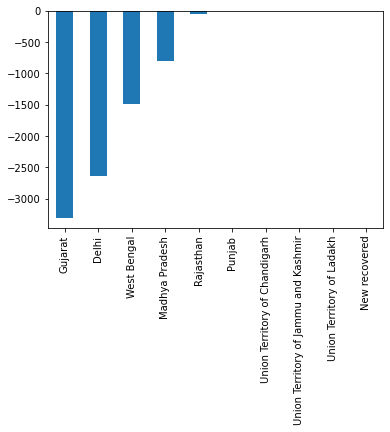

In [65]:
model.params.sort_values(ascending=True).head(10).plot(kind='bar')
#these are the top 10  features which are contributing in negative coefficent we can also infer these states are responsible for more number of covid cases

<AxesSubplot:>

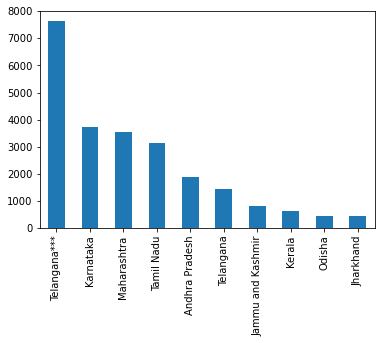

In [66]:
model.params.sort_values(ascending=False).head(10).plot(kind='bar')
#these are the top 10 features are contriuting the most in positive coefficents 

In [67]:
df=pd.read_csv('CasesState&Date_wise.csv')

In [68]:
df[['Month','Date','Year']]=df['Date'].str.split('/',expand=True)

In [69]:
a=df.groupby(['Year','Name of State / UT'])['Total Confirmed cases'].sum()

In [70]:
Month_7=df[df['Month']=='7'][['Name of State / UT','Total Confirmed cases']]

In [71]:
e=Month_7.groupby('Name of State / UT')['Total Confirmed cases'].sum()

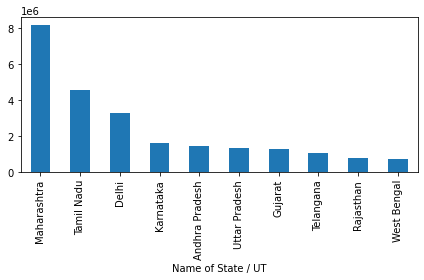

In [72]:

e.sort_values(ascending=False).head(10).plot(kind='bar')
plt.tight_layout()

In [73]:
z=a.sort_values(ascending=False)

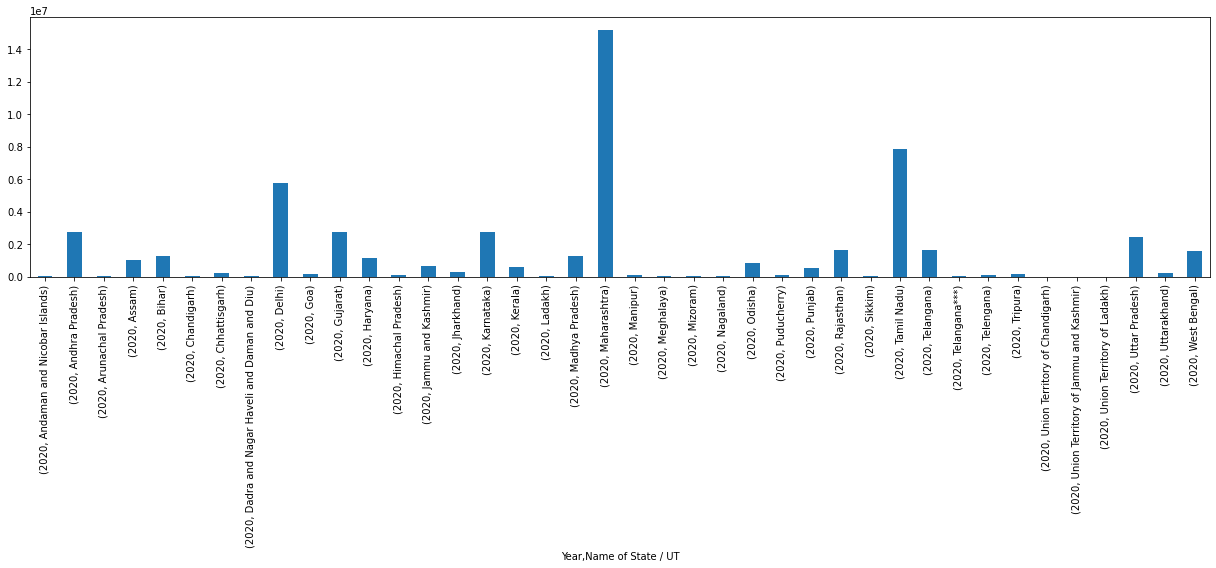

In [74]:
#infrence (4)
plt.figure(figsize=[17,8])
z.head(60).sort_index().plot(kind='bar')
plt.tight_layout()

In [75]:
a1=df.groupby(['Month','Year','Name of State / UT'])['Total Confirmed cases'].sum()

<AxesSubplot:xlabel='Month,Year,Name of State / UT'>

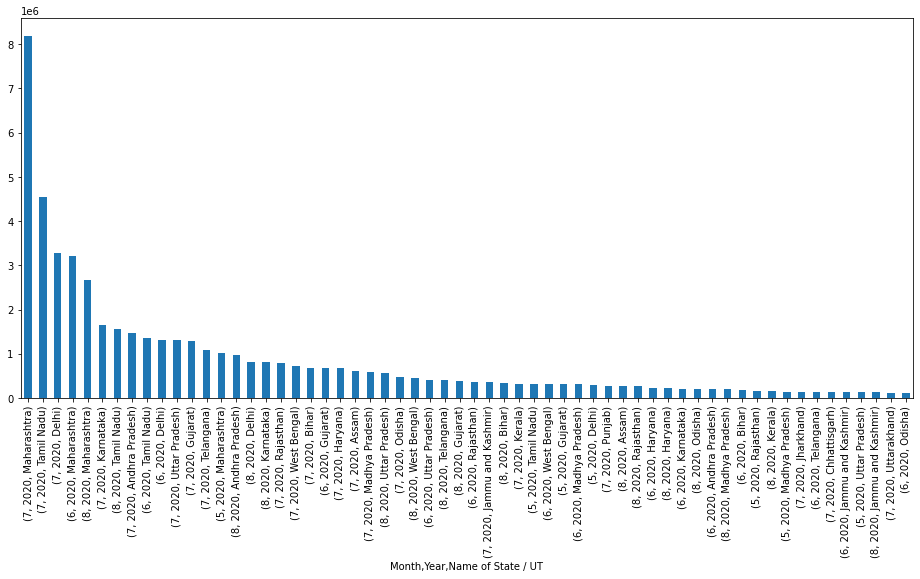

In [76]:
#infrence (try with medicine)
plt.figure(figsize=(16,7))
a1.sort_values(ascending=False).head(60).plot(kind='bar')

In [77]:
we=df.sort_values(ascending=False,by=['Month','Total Confirmed cases'])[['Name of State / UT','Total Confirmed cases']]

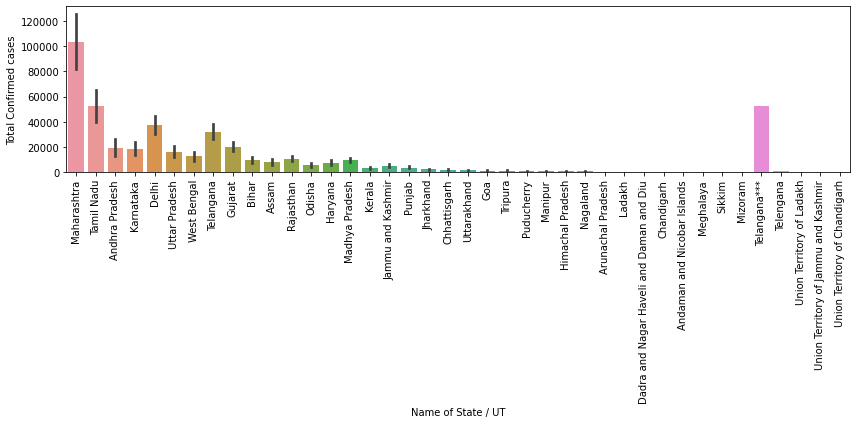

In [78]:
#infrence(4)
plt.figure(figsize=[12,6])
plt.xticks(rotation='vertical')
sns.barplot(x=we['Name of State / UT'],y=we['Total Confirmed cases'])
plt.tight_layout()